## TMA4215 - Project #1 ## 
*27.09.2024*

*Candidate ID*

In this project I have used numerical methods for Fourier series based signal processing.

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import pandas as pd
from numba import jit, njit

In [103]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)

#### Task 1: The (Discrete) Fourier Transform

#### a)

Considering the functions $e^{2\pi ikx}$, $k \in \mathbb{Z}$, $x \in \mathbb{T}$. I am going to below prove that for any $k, h \in \mathbb{Z}$ we have

$$
\left\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \right\rangle = 
\begin{cases} 
1 & \text{if } k = h \\
0 & \text{else}
\end{cases}
$$


The inner product of two functions $f(x)$ and $g(x)$ on the interval $[0, 1)$ is defined as:

$$
\langle f, g \rangle = \int_0^1 f(x) \overline{g(x)} \, dx
$$

For our case, $f(x) = e^{2\pi i k x}$ and $g(x) = e^{2\pi i h x}$. The complex conjugate of $g(x)$ is:

$$
\overline{g(x)} = e^{-2\pi i h x}
$$

Thus, the inner product becomes:

$$
\langle e^{2\pi i k x}, e^{2\pi i h x} \rangle = \int_0^1 e^{2\pi i k x} \cdot e^{-2\pi i h x} \, dx = \int_0^1 e^{2\pi i (k - h) x} \, dx
$$

We have two cases:

1. **$k = h$:**

$$
\int_0^1 e^{2\pi i (k - h) x} \, dx = \int_0^1 e^{0} \, dx = \int_0^1 1 \, dx = 1
$$

So, the inner product is 1 when $k = h$.

2. **$k \neq h$:**

In this case, let $m = k - h \neq 0$. We need to evaluate:

$$
\int_0^1 e^{2\pi i m x} \, dx
$$

Computing the integral:

$$
\int e^{2\pi i m x} \, dx = \frac{e^{2\pi i m x}}{2\pi i m}
$$

Now evaluating from $0$ to $1$ gives:

$$
\left[ \frac{e^{2\pi i m x}}{2\pi i m} \right]_0^1 = \frac{e^{2\pi i m \cdot 1} - e^{2\pi i m \cdot 0}}{2\pi i m} = \frac{e^{2\pi i m} - 1}{2\pi i m}
$$

Since $e^{2\pi i m} = 1$ for any integer $m$, we have:

$$
\frac{1 - 1}{2\pi i m} = 0
$$

Thus, the inner product is $0$ when $k \neq h$.

$\square$


#### b)

Now considering the functions of the form $\sqrt{2} \sin(2\pi mx)$, $m = 1, 2, \ldots$, $\cos(2\pi 0 x)$, and $\sqrt{2} \cos(2\pi nx)$, $n = 1, 2, \ldots$, $x \in \mathbb{T}$. I want to prove that these form an orthonormal system, meaning we need to show that the following three properties hold.

1. **Orthogonality between sine and cosine functions:**

The inner product of the sine and cosine function is given by:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 2 \int_0^1 \sin(2\pi n x) \cos(2\pi m x) \, dx
$$

Using the trigonometric identity

$$
\sin A \cos B = \frac{1}{2} [\sin(A + B) + \sin(A - B)],
$$

we get

$$
2 \int_0^1 \sin(2\pi n x) \cos(2\pi m x) \, dx = \int_0^1 [\sin(2\pi (n+m) x) + \sin(2\pi (n-m) x)] \, dx
$$

Both integrals of $\sin(2\pi k x)$ over the interval $[0, 1]$ are zero because the sine function completes an integer number of periods, and its average value over a full period is zero. Therefore, the inner product is also zero. Hence:

$$
\langle \sqrt{2} \sin(2\pi n \cdot), \sqrt{2} \cos(2\pi m \cdot) \rangle = 0, \quad n \in \{1, 2, \ldots\}, \, m \in \{0, 1, \ldots\}
$$

2. **Orthogonality and normality between two sine functions:**

The inner product of two of the given sine functions is:

$$
\langle \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \rangle = 2 \int_0^1 \sin(2\pi n x) \sin(2\pi m x) \, dx
$$

Using the identity

$$
\sin A \sin B = \frac{1}{2} [\cos(A - B) - \cos(A + B)],
$$

we get

$$
2 \int_0^1 \sin(2\pi n x) \sin(2\pi m x) \, dx = \int_0^1 [\cos(2\pi (n-m) x) - \cos(2\pi (n+m) x)] \, dx
$$

The integral of $\cos(2\pi k x)$ over $[0, 1]$ is zero for any integer $k \neq 0$ (when $n \neq m$). For $k = 0$ (when $n = m$), the integral of $1$ over $[0, 1]$ is $1$. Hence, the inner product is $1$ if $n = m$ and $0$ otherwise. So:

$$
\langle \sqrt{2} \sin(2\pi n \cdot), \sqrt{2} \sin(2\pi m \cdot) \rangle = 
\begin{cases} 
0 & \text{if } m \neq n \\
1 & \text{if } m = n 
\end{cases}, \quad m, n \in \{1, 2, \ldots\}
$$

3. **Orthogonality and normality between two cosine functions:**

The inner product of two of the given cosine functions is:

$$
\langle \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \rangle = 2 \int_0^1 \cos(2\pi n x) \cos(2\pi m x) \, dx
$$

Using the identity

$$
\cos A \cos B = \frac{1}{2} [\cos(A + B) + \cos(A - B)],
$$

we get

$$
2 \int_0^1 \cos(2\pi n x) \cos(2\pi m x) \, dx = \int_0^1 [\cos(2\pi (n + m) x) + \cos(2\pi (n - m) x)] \, dx
$$

The integral of $\cos(2\pi k x)$ over $[0, 1]$ is zero for any integer $k \neq 0$. For $k = 0$ (when $n = m$), the integral of $1$ over $[0, 1]$ is $1$. For $n = m = 0$, the integral of $1$ over $[0, 1]$ multiplied by $2$ is $2$. Hence, the inner product is $2$ if $n = m = 0$, $1$ if $n = m \neq 0$, and $0$ otherwise. Which we can write as:

$$
\langle \sqrt{2} \cos(2\pi n \cdot), \sqrt{2} \cos(2\pi m \cdot) \rangle = 
\begin{cases} 
0 & \text{if } m \neq n \\
1 & \text{if } m = n \neq 0 \\
2 & \text{if } m = n = 0 
\end{cases}, \quad m, n \in \{0, 1, \ldots\}
$$

$\square$


#### c)

Now we introduce the following two spaces, $T_n$ and $S_n$:

$$
T_n := \text{span}(e^{-2\pi in\cdot}, \ldots, e^{2\pi in\cdot}) = \left\{ f \, \middle| \, f(x) = \sum_{k=-n}^{n} c_k e^{2\pi ikx}, \, \text{where } c_{-n}, c_{-n+1}, \ldots, c_n \in \mathbb{C} \right\}
$$

$$
S_n := \text{span}(\cos(0\cdot), \cos(2\pi\cdot), \ldots, \cos(2\pi n\cdot), \sin(2\pi\cdot), \sin(2\pi \cdot 2), \ldots, \sin(2\pi n\cdot))
$$

$$
= \left\{ f \, \middle| \, f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2\pi kx) + b_k \sin(2\pi kx), \, \text{where } a_0, a_1, \ldots, a_n, b_1, \ldots, b_n \in \mathbb{R} \right\}
$$

Using the results from Item a) and b) I want to find orthonormal bases for these two spaces.

**Orthonormal basis for $T_n$:**

From Item a), we have shown that the functions $e^{2\pi i k \cdot}$ for $k = -n, \ldots, n$ form an orthonormal set on the interval $[0, 1)$. To construct an orthonormal basis for $T_n$, we consider the set:

$$
\left\{ e^{2\pi i k x} \, \middle| \, k = -n, \ldots, n \right\}
$$

Thus, the orthonormal basis for $T_n$ is:

$$
\left\{ e^{2\pi i k x} \, \middle| \, k = -n, \ldots, n \right\}
$$

**Orthonormal basis for $S_n$:**

From Item b), we have shown the orthogonality properties of the sine and cosine functions. We can use the results to form orthonormal bases for $S_n$.

- **For Cosine Functions:**

The function $\cos(0)$ is not normalized, so we use $1$ instead of $\cos(0)$. For $k = 1, \ldots, n$, the normalized cosine functions are $\sqrt{2} \cos(2\pi k x)$.

The orthonormal basis for the cosine components is:

$$
\left\{ 1, \sqrt{2} \cos(2\pi k x) \, \middle| \, k = 1, 2, \ldots, n \right\}
$$

- **For Sine Functions:**

For $k = 1, \ldots, n$, the normalized sine functions are $\sqrt{2} \sin(2\pi k x)$.

The orthonormal basis for the sine components is:

$$
\left\{ \sqrt{2} \sin(2\pi k x) \, \middle| \, k = 1, 2, \ldots, n \right\}
$$


**Proving $T_n = S_n$ Using Euler's Identity:**

Euler's identity states:

$$
e^{i\theta} = \cos(\theta) + i\sin(\theta)
$$

Using this, we can express the exponential functions in $T_n$ in terms of sines and cosines:

$$
e^{2\pi ikx} = \cos(2\pi kx) + i\sin(2\pi kx)
$$

$$
e^{-2\pi ikx} = \cos(2\pi kx) - i\sin(2\pi kx)
$$

Therefore, any function $f(x)$ in $T_n$ can be written as:

$$
f(x) = \sum_{k=-n}^{n} c_k e^{2\pi ikx} = c_0 + \sum_{k=1}^{n} c_k e^{2\pi ikx} + c_{-k} e^{-2\pi ikx}
$$

Substituting the identities:

$$
f(x) = c_0 + \sum_{k=1}^{n} \left[ c_k (\cos(2\pi kx) + i\sin(2\pi kx)) + \overline{c_k} (\cos(2\pi kx) - i\sin(2\pi kx)) \right]
$$

$$
f(x) = c_0 + \sum_{k=1}^{n} \left[ (c_k + \overline{c_k}) \cos(2\pi kx) + i(c_k - \overline{c_k}) \sin(2\pi kx) \right]
$$

Since $c_k = \overline{c_{-k}}$, we can set $c_k + \overline{c_k} = 2\Re(c_k) = a_k$ and $i(c_k - \overline{c_k}) = 2i \Im(c_k) = b_k$. This transforms the expression into:

$$
f(x) = c_0 + \sum_{k=1}^{n} a_k \cos(2\pi kx) + b_k \sin(2\pi kx)
$$

This is precisely the form of the function in $S_n$. Therefore, every function in $T_n$ can be represented as a function in $S_n$. Conversely, any function in $S_n$ can be represented in terms of the exponential form of $T_n$. Hence, $T_n = S_n$.

**Dimension of $T_n$:**

The dimension of $T_n$ is the number of linearly independent basis functions. The basis functions for $T_n$ are $e^{-2\pi inx}, e^{-2\pi i(n-1)x}, \ldots, e^{2\pi inx}$.

Since there are $2n + 1$ such basis functions, the dimension of $T_n$ is:

$$
\text{dim}(T_n) = 2n + 1
$$


#### d)

From Item c), any function $ f(x) \in S_n $ can be expressed as:

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2\pi kx) + b_k \sin(2\pi kx)
$$

where $ a_0, a_1, \ldots, a_n $ and $ b_1, \ldots, b_n $ are the Fourier coefficients.

This representation decomposes any function in $S_n$ into a finite sum of simpler trigonometric functions.

The inner product on the space $S_n$ is defined as:

$$
\langle f, g \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) g(x) \, dx
$$

We know from previously that the set of functions:

$$
\{ 1, \sqrt{2} \cos(2\pi kx), \sqrt{2} \sin(2\pi kx) \, \mid \, k = 1, 2, \ldots, n \}
$$

forms an orthonormal basis for $S_n$.

Taking the inner product of $f(x)$ with each of these basis functions allows us to isolate each Fourier coefficient.

To find $ a_k $, we take the inner product of $ f(x) $ with $ \cos(2\pi kx) $:

$$
\langle f, \cos(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \cos(2\pi kx) \, dx
$$

Now we substitute the representation of $ f(x) $ into this integral:

$$
\langle f, \cos(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} \left( \frac{a_0}{2} + \sum_{j=1}^{n} a_j \cos(2\pi jx) + b_j \sin(2\pi jx) \right) \cos(2\pi kx) \, dx
$$


$$
\langle f, \cos(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{a_0}{2} \cos(2\pi kx) \, dx + \sum_{j=1}^{n} a_j \int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(2\pi jx) \cos(2\pi kx) \, dx + \sum_{j=1}^{n} b_j \int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2\pi jx) \cos(2\pi kx) \, dx
$$

Using orthogonality properties:

1. **Orthogonality of cosine with cosine:**

$$
\int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(2\pi jx) \cos(2\pi kx) \, dx = 
\begin{cases}
\frac{1}{2} & \text{if } j = k \\
0 & \text{if } j \neq k
\end{cases}
$$

2. **Orthogonality of sine with cosine:**

$$
\int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2\pi jx) \cos(2\pi kx) \, dx = 0 \quad \forall j, k
$$

This simplifies the expression for $ \langle f, \cos(2\pi k \cdot) \rangle $ to:

$$
\langle f, \cos(2\pi k \cdot) \rangle = \frac{a_k}{2}
$$

Where we have:

$$
a_k = 2 \langle f, \cos(2\pi k \cdot) \rangle = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \cos(2\pi kx) \, dx
$$

for $ k = 0, 1, \ldots, n $.

The orthogonality property of the cosine functions allows all other terms in the series expansion of $ f(x) $ to cancel out, leaving only the $ a_k $ term.

Furthermore, to find $ b_k $, we take the inner product of $ f(x) $ with $ \sin(2\pi kx) $:

$$
\langle f, \sin(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin(2\pi kx) \, dx
$$

Substituting the representation of $ f(x) $ into the integral:

$$
\langle f, \sin(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} \left( \frac{a_0}{2} + \sum_{j=1}^{n} a_j \cos(2\pi jx) + b_j \sin(2\pi jx) \right) \sin(2\pi kx) \, dx
$$

Expanding:

$$
\langle f, \sin(2\pi k \cdot) \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{a_0}{2} \sin(2\pi kx) \, dx + \sum_{j=1}^{n} a_j \int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(2\pi jx) \sin(2\pi kx) \, dx + \sum_{j=1}^{n} b_j \int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2\pi jx) \sin(2\pi kx) \, dx
$$

Using orthogonality properties:

1. **Orthogonality of cosine with sine:**

$$
\int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(2\pi jx) \sin(2\pi kx) \, dx = 0 \quad \forall j, k
$$

2. **Orthogonality of sine with sine:**

$$
\int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(2\pi jx) \sin(2\pi kx) \, dx = 
\begin{cases}
\frac{1}{2} & \text{if } j = k \\
0 & \text{if } j \neq k
\end{cases}
$$

This simplifies the expression for $ \langle f, \sin(2\pi k \cdot) \rangle $ to:

$$
\langle f, \sin(2\pi k \cdot) \rangle = \frac{b_k}{2}
$$

So,

$$
b_k = 2 \langle f, \sin(2\pi k \cdot) \rangle = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin(2\pi kx) \, dx
$$

for $ k = 1, \ldots, n $.

Here the orthogonality property of the sine functions allows all other terms in the series expansion of $ f(x) $ to drop out, leaving only the $ b_k $ term.

Hence, we have shown that the Fourier coefficients $ a_k $ and $ b_k $ can be computed as:

$$
a_k = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \cos(2\pi kx) \, dx, \quad k = 0, 1, \ldots, n
$$

$$
b_k = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin(2\pi kx) \, dx, \quad k = 1, \ldots, n
$$

$\square$

#### e)

Using equidistant points $ x_0, \ldots, x_{N-1} $, where $ x_j = \frac{j}{N} $, $ j = 0, \ldots, N-1 $, for some $ N \in \mathbb{N} $, I want to approximate the integral required for the Fourier coefficients $c_k(f)$ of a function $f$. Note that the notation $ f_j = f(x_j) $ and $ \mathbf{f} = (f_0, \ldots, f_{N-1}) $ holds for simplicity.

The Fourier coefficient $c_k(f)$ is defined as:

$$
c_k(f) = \int_{0}^{1} f(x) e^{-2\pi i k x} \, dx.
$$

The trapezoidal rule is a numerical integration method that approximates the area under a curve by dividing it into trapezoids. To approximate this integral, we will use the composite trapezoidal rule with equidistant points $ x_j = \frac{j}{N} $, where $ j = 0, 1, \ldots, N-1 $.

For a function $ f(x) $ sampled at $ N $ equidistant points $ x_j = \frac{j}{N} $, $ j = 0, 1, \ldots, N-1 $, the trapezoidal rule approximation of the integral is:

$$
\int_0^1 f(x) \, dx \approx \frac{1}{N} \sum_{j=0}^{N-1} f(x_j).
$$

So the trapezoidal approximation is in our case given by:

$$
c_k(f) \approx \hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i jk / N}
$$

where $ f_j = f(x_j) = f\left(\frac{j}{N}\right) $.

Now we want to show $N$-Periodicity of $ \hat{f}_k $. In other words, we want to show that:

$$
\hat{f}_{k+N} = \hat{f}_k.
$$

Substituting $k+N$ into the formula for $ \hat{f}_k $:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i j(k+N) / N}.
$$

Simplifying the exponent:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i jk / N} e^{-2\pi i j}.
$$

Since $ e^{-2\pi i j} = 1 $ for any integer $ j $, we have:

$$
\hat{f}_{k+N} = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i jk / N} = \hat{f}_k.
$$

This shows that the coefficients $ \hat{f}_k $ are $ N $-periodic, meaning that:

$$
\hat{f}_{k+N} = \hat{f}_k \quad \forall k \in \mathbb{Z}.
$$

The periodicity of $ \hat{f}_k $ implies that the DFT assumes the original function $ f(x) $ is periodic with period $ 1 $ (the interval $[0, 1)$). If $ f(x) $ is not truly periodic with period $ 1 $, the periodicity of the DFT coefficients can cause *aliasing*, where higher frequencies in the original function are misrepresented in the approximation. The approximation of the Fourier coefficients using $ \hat{f}_k $ involves a truncation error due to the finite number of points $ N $. As $ N $ increases, this error decreases, and the approximation becomes more accurate.

#### f)

Let $ N \in \mathbb{N} $ and $ k \in \mathbb{Z} $. We need to prove that:

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijk / N} = 
\begin{cases}
1 & \text{if } k \mod N \equiv 0, \\
0 & \text{else}.
\end{cases}
$$

**Case 1: $ k \mod N = 0 $**

If $k$ is a multiple of $N$, that is, $ k = mN $ for some integer $m$, then:

$$
e^{-2\pi ijk / N} = e^{-2\pi ij(mN) / N} = e^{-2\pi ijm} = 1
$$

for all $ j $. The sum becomes:

$$
\frac{1}{N} \sum_{j=0}^{N-1} 1 = \frac{1}{N} \cdot N = 1.
$$

This shows that:

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijk / N} = 1 \quad \text{if } k \mod N = 0.
$$

**Case 2: $ k \mod N \neq 0 $**

If $ k \mod N \neq 0 $, let $ k = mN + r $ where $r$ is the remainder when $k$ is divided by $N$ (i.e., $ 0 < |r| < N $). Then the sum becomes:

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ij(mN + r) / N} = \frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijm} e^{-2\pi ijr / N}.
$$

Since $ e^{-2\pi ijm} = 1 $, this can be simplified to:

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijr / N}.
$$

Now we need to compute the sum of this geometric series. The sum of a geometric series $ \sum_{j=0}^{N-1} e^{-2\pi ijr / N} $ with ratio $ e^{-2\pi ir / N} $ is given by:

$$
\sum_{j=0}^{N-1} e^{-2\pi ijr / N} = \frac{1 - \left( e^{-2\pi ir / N} \right)^N}{1 - e^{-2\pi ir / N}}.
$$

Since $ \left( e^{-2\pi ir / N} \right)^N = e^{-2\pi ir} $ and $ e^{-2\pi ir} = 1 $ when $ r = N $, but not for $ 0 < |r| < N $, the numerator $ 1 - e^{-2\pi ir} $ becomes $0$. Therefore, the sum is 0.

Hence, for $ k \mod N \neq 0 $, we have:

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi ijk / N} = 0.
$$

$\square$

#### g)


We want to represent the discrete Fourier transform (DFT) of a vector $ \mathbf{f} $ using the matrix $ \mathcal{F}_N \in \mathbb{C}^{N \times N} $. The DFT is given by:

$$
\hat{\mathbf{f}} = \frac{1}{N} \mathcal{F}_N \mathbf{f},
$$

where $ \mathcal{F}_N $ is defined as:

$$
\mathcal{F}_N = \left( e^{-2\pi i kl / N} \right)_{k,l = 0}^{N-1}.
$$

We need to prove that the inverse $ \mathcal{F}_N^{-1} $ is a scaled version of the complex conjugate of $ \mathcal{F}_N $, given by:

$$
\overline{\mathcal{F}_N} = \left( e^{2\pi i kl / N} \right)_{k,l = 0}^{N-1}.
$$

The matrix $ \mathcal{F}_N $ is defined as:

$$
\mathcal{F}_N = \left( e^{-2\pi i kl / N} \right)_{k,l = 0}^{N-1}.
$$

The conjugate transpose (Hermitian) of $ \mathcal{F}_N $, denoted as $ \mathcal{F}_N^* $, is given by:

$$
\mathcal{F}_N^* = \overline{\mathcal{F}_N}^T = \left( e^{2\pi i kl / N} \right)_{k,l = 0}^{N-1}.
$$

We will now compute the product $ \mathcal{F}_N \mathcal{F}_N^* $ to show that it is a scaled identity matrix.

$$
\left( \mathcal{F}_N \mathcal{F}_N^* \right)_{k,m} = \sum_{l=0}^{N-1} e^{-2\pi i kl / N} e^{2\pi i lm / N} = \sum_{l=0}^{N-1} e^{2\pi i (m-k)l / N}.
$$

The sum 

$$
\sum_{l=0}^{N-1} e^{2\pi i (m-k)l / N}
$$ 

is a geometric series with ratio $ e^{2\pi i (m-k) / N} $.

- If $ m = k $, the sum is:

$$
\sum_{l=0}^{N-1} e^{0} = N.
$$

- If $ m \neq k $, the sum is:

$$
\sum_{l=0}^{N-1} e^{2\pi i (m-k)l / N} = \frac{1 - \left( e^{2\pi i (m-k) / N} \right)^N}{1 - e^{2\pi i (m-k)/N}} = 0,
$$

since $ e^{2\pi i (m-k)} = 1 $.

Thus, the matrix product $ \mathcal{F}_N \mathcal{F}_N^* $ is given by:

$$
\mathcal{F}_N \mathcal{F}_N^* = N \mathbf{I}_N,
$$

where $ \mathbf{I}_N $ is the $ N \times N $ identity matrix.

This result implies that:

$$
\mathcal{F}_N^{-1} = \frac{1}{N} \mathcal{F}_N^*.
$$

Since $ \mathcal{F}_N^* = \overline{\mathcal{F}_N} $, we have:

$$
\mathcal{F}_N^{-1} = \frac{1}{N} \overline{\mathcal{F}_N}.
$$

This proves that the inverse of $ \mathcal{F}_N $ is a scaled version of its complex conjugate.

Many mathematicians will prefer the scaled version $ \frac{1}{\sqrt{N}} \mathcal{F}_N $ because using $ \frac{1}{\sqrt{N}} $ for both the DFT and its inverse ensures that both transformations are symmetric. This means that the forward and inverse DFTs have the same form, which simplifies proofs and calculations. Also the scaling preserves the norm of the vector, meaning that the transformation does not amplify or reduce the energy (norm) of the signal. Moreover, with the scaling factor $ \frac{1}{\sqrt{N}} $, the matrix $ \mathcal{F}_N $ becomes an orthogonal matrix (up to a complex conjugate), which means $ \mathcal{F}_N \mathcal{F}_N^* = \mathbf{I}_N $. These properties are highly desirable in for example signal processing as we will observe later in this project!

#### h)

For a vector $ \mathbf{a} = (a_0, \ldots, a_{N-1})^T $, we define the *circulant matrix* $ \text{circ}(\mathbf{a}) $ as:

$$
\text{circ}(\mathbf{a}) = \left( a_{k-l \mod N} \right)_{k,l = 0}^{N-1} = 
\begin{pmatrix}
a_0 & a_{N-1} & \cdots & a_2 & a_1 \\
a_1 & a_0 & \cdots & a_3 & a_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
a_{N-1} & a_{N-2} & \cdots & a_1 & a_0
\end{pmatrix}.
$$

We need to prove that the Fourier matrix $ \mathcal{F}_N $ diagonalizes the circulant matrix, i.e., using $ \hat{\mathbf{a}} = \mathcal{F}_N \mathbf{a} $, we get:

$$
\text{circ}(\mathbf{a}) = \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N,
$$

where $ \text{diag}(\cdot) $ denotes a diagonal matrix.

The Fourier transform of the vector $ \mathbf{a} $ is given by:

$$
\hat{\mathbf{a}} = \mathcal{F}_N \mathbf{a}.
$$

Each component $ \hat{a}_k $ is:

$$
\hat{a}_k = \sum_{l=0}^{N-1} a_l e^{-2\pi i kl / N}.
$$

We want to show that:

$$
\text{circ}(\mathbf{a}) = \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N.
$$

Consider a single entry of the matrix product $ \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N $ on the right-hand side.

The $(k,m)$-th entry of the matrix product is given by:

$$
\left( \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N \right)_{k,m} = \frac{1}{N} \sum_{p=0}^{N-1} e^{2\pi i kp / N} \hat{a}_p e^{-2\pi i pm / N}.
$$

Substitute $ \hat{a}_p = \sum_{l=0}^{N-1} a_l e^{-2\pi i pl / N} $:

$$
\left( \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N \right)_{k,m} = \frac{1}{N} \sum_{p=0}^{N-1} e^{2\pi i kp / N} \left( \sum_{l=0}^{N-1} a_l e^{-2\pi i pl / N} \right) e^{-2\pi i pm / N}.
$$

Rearranging the summation order, we have:

$$
\left( \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N \right)_{k,m} = \frac{1}{N} \sum_{l=0}^{N-1} a_l \sum_{p=0}^{N-1} e^{2\pi i kp / N} e^{-2\pi i p(l + m) / N}.
$$

Combining the exponents:

$$
\left( \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N \right)_{k,m} = \frac{1}{N} \sum_{l=0}^{N-1} a_l \sum_{p=0}^{N-1} e^{2\pi i p(k - (l + m)) / N}.
$$

The inner sum is a geometric series:

$$
\sum_{p=0}^{N-1} e^{2\pi i p(k - (l + m)) / N}.
$$

This sum is zero unless $ k \equiv l + m \pmod{N} $, in which case it equals $ N $.

When $ k \equiv l + m \pmod{N} $, the sum becomes:

$$
\left( \mathcal{F}_N^{-1} \text{diag}(\hat{\mathbf{a}}) \mathcal{F}_N \right)_{k,m} = \sum_{l=0}^{N-1} a_l \delta_{k, l+m \mod N},
$$

where $ \delta_{k, l+m \mod N} $ is the Kronecker delta.

This expression matches the definition of the circulant matrix $ \text{circ}(\mathbf{a}) $.

We have shown that for a vector $ \mathbf{a} $, the circulant matrix $ \text{circ}(\mathbf{a}) $ can be diagonalized using the Fourier matrix $ \mathcal{F}_N $. This property of circulant matrices is useful in applications where fast computations of convolutions are required.


#### i)

Explain what my code does here.

In [30]:
def transform(f, N, start=0.0):

    # Generates N equally spaced points
    x_values = np.linspace(start, start + 1, N)

    # Computes function values at sampled points
    f_values = f(x_values)
    fft_values = fft.fft(f_values, norm='forward')
    
    return x_values, f_values, fft_values

In [22]:
# Defining the given functions
def f_1(x):
    return np.sin(4 * np.pi * x)

def f_2(x):
    return np.sin(8 * np.pi * x) + np.cos(32 * np.pi * x)

def f_3(x):
    return x

def f_4(x):
    return 1 - np.abs(x)

In [99]:
Ns = [5, 9, 129]

def plot_function_and_fft(f, function_index, start=0.0):
    
    fig, axes = plt.subplots(2, len(Ns), figsize=(14, 7))
    fig.suptitle(f'Function $\mathbf{{f_{function_index + 1}}}$ and its DFT for different N values', fontsize=16)

    for i, N in enumerate(Ns):
        x_values, f_values, fft_values = transform(f, N, start)

        # Plot the function values (in the first row)
        axes[0, i].plot(x_values, f_values, label=f'$\mathbf{{f}}$')
        axes[0, i].set_title(f'N={N}')
        axes[0, i].legend()

        # Plot the real and imaginary parts of the FFT values (in the second row)
        axes[1, i].plot(np.real(fft_values), label='$\Re(\hat{\mathbf{f}})$', color='orange')
        axes[1, i].plot(np.imag(fft_values), label='$\Im(\hat{\mathbf{f}})$', color='purple')
        axes[1, i].legend()
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
    return fig



<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:18: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:18: SyntaxWarning: invalid escape sequence '\I'
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/1155382093.py:6: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle(f'Function $\mathbf{{f_{function_index + 1}}}$ and its DFT for different N values', fontsize=16)
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/1155382093.py:12: SyntaxWarning: invalid escape sequence '\m'
  axes[0, i].plot(x_values, f_values, label=f'$\mathbf{{f}}$')
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/1155382093.py:17: SyntaxWarning: invalid escape sequence '\R'
  axes[1, i].plot(np.real(fft_values), 

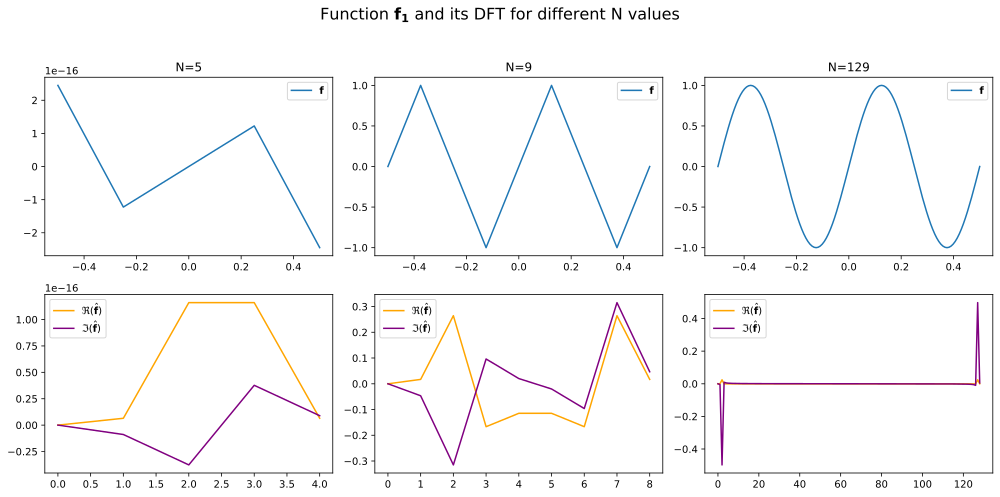

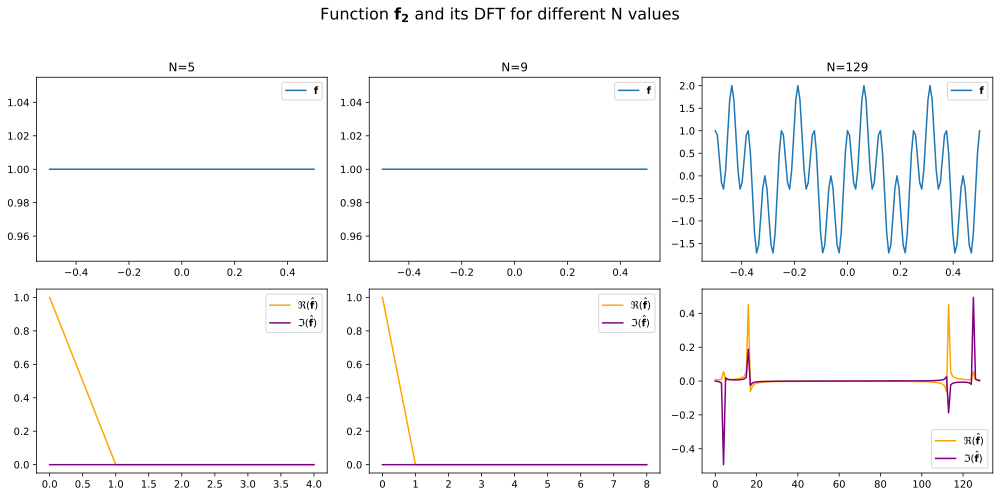

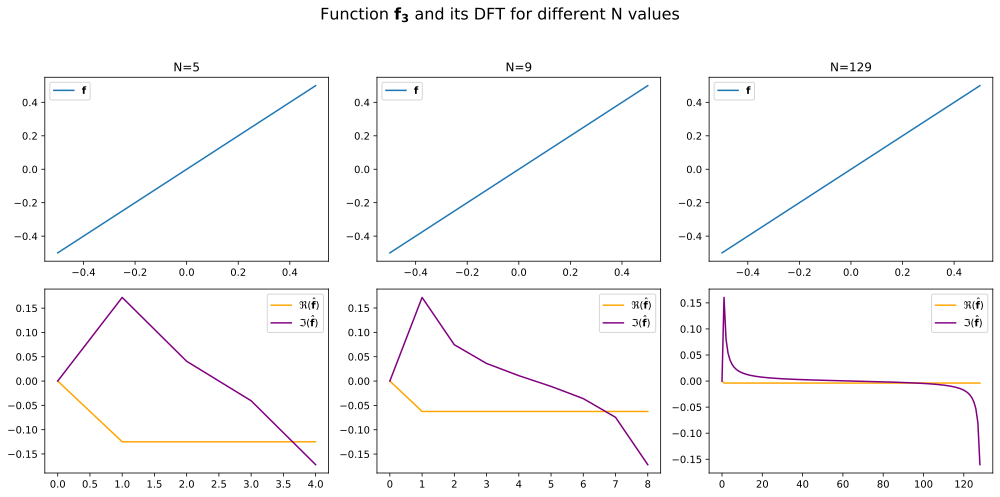

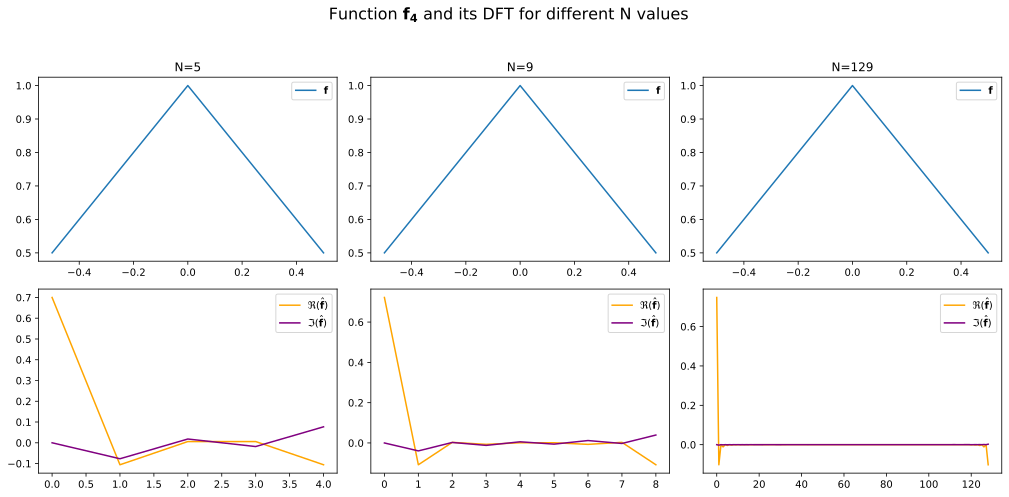

In [100]:
functions = [f_1, f_2, f_3, f_4]

# Generate plots for each function in separate figures with columnwise N values
for i, func in enumerate(functions):
    plot_function_and_fft(func, i, start=-0.5)

plt.show()

Discuss results here.

$\mathbf{f}$ approximates f well for...

#### j)

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/3689904218.py:4: SyntaxWarning: invalid escape sequence '\h'
  fig.suptitle(f'Discrete Fourier Coefficients $\hat{{f}}$ for different N values', fontsize=16)
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/3689904218.py:14: SyntaxWarning: invalid escape sequence '\h'
  axes[i].set_ylabel(f'Magnitude |$\hat{{f_2}}(k)$|')


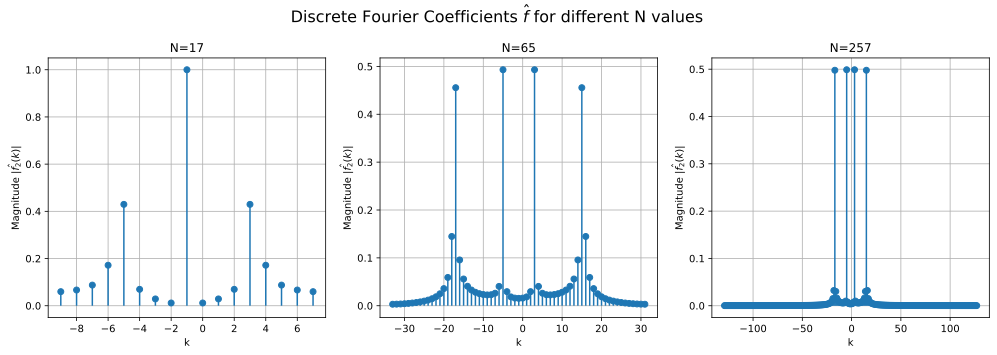

In [101]:
Ns = [17, 65, 257]

fig, axes = plt.subplots(1, len(Ns), figsize=(14, 5))  # Adjusted to 1 row and len(Ns) columns
fig.suptitle(f'Discrete Fourier Coefficients $\hat{{f}}$ for different N values', fontsize=16)

for i, N in enumerate(Ns):
    x_values, f_values, fft_values = transform(f_2, N, -0.5)
    shifted_fft_values = fft.fftshift(fft_values)
    
    # Plot the magnitude of the Fourier coefficients
    axes[i].stem(np.arange(-N//2, N//2), np.abs(shifted_fft_values), basefmt=" ")
    axes[i].set_title(f'N={N}')
    axes[i].set_xlabel('k')
    axes[i].set_ylabel(f'Magnitude |$\hat{{f_2}}(k)$|')
    axes[i].grid()

plt.tight_layout()
plt.show()

Answer the questions here

#### Task 2: Signal Processing

#### a)

If we take the cyclic convolution of $\mathbf{a}$ and $\mathbf{b}$, denoted as $c = \mathbf{a} \ast \mathbf{b}$, it is defined by:

$$
(a \ast b)_j = \sum_{k=0}^{N-1} a_k b_{j-k \mod N}
$$

for each $j$. This means that the convolution result for each index $j$ is the sum of the products of $a_k$ and $b_{j-k \mod N}$.

Now considering the shifted version of $\mathbf{b}$, given by $\mathbf{b}' = (b_{N-1}, b_0, \ldots, b_{N-2})$. In this case, the elements of $\mathbf{b}$ have been cyclically shifted to the right by one position. The convolution of $\mathbf{a}$ with $\mathbf{b}'$, denoted as $c' = \mathbf{a} \ast \mathbf{b}'$, can be expressed as:

$$
c'_j = \sum_{k=0}^{N-1} a_k b'_{j-k \mod N}
$$

Since $b'_{j-k \mod N} = b_{(j-k-1) \mod N}$, the convolution with $\mathbf{b}'$ results in shifting the convolution result $c$ by one position to the left. In other words, $c'_j = c_{(j+1) \mod N}$.

Hence, the effect of convolving $\mathbf{a}$ with $\mathbf{b}'$ instead of $\mathbf{b}$ is simply a leftward cyclic shift of the convolution result. This relationship can be summarized as:

$$
c'_j = c_{(j+1) \mod N}
$$

for all $j \in \{0, 1, \ldots, N-1\}$.


#### b)

#### Proof of $ c_k(f \ast g) = c_k(f)c_k(g) $

For functions $ f, g \in L_1(\mathbb{T}) $, the convolution $ (f \ast g)(x) $ is defined as:

$$
(f \ast g)(x) = \int_{\mathbb{T}} f(y) g(x-y) \, dy.
$$

Fourier Series expansion:

The Fourier coefficients $ c_k(f) $ and $ c_k(g) $ are given by:

$$
c_k(f) = \int_{\mathbb{T}} f(x) e^{-2\pi ikx} \, dx,
$$

$$
c_k(g) = \int_{\mathbb{T}} g(x) e^{-2\pi ikx} \, dx.
$$

For the convolution $ f \ast g $, the Fourier coefficient $ c_k(f \ast g) $ is:

$$
c_k(f \ast g) = \int_{\mathbb{T}} (f \ast g)(x) e^{-2\pi ikx} \, dx.
$$

Substitute the definition of $ (f \ast g)(x) $:

$$
c_k(f \ast g) = \int_{\mathbb{T}} \left( \int_{\mathbb{T}} f(y) g(x-y) \, dy \right) e^{-2\pi ikx} \, dx.
$$

By Fubini's theorem, we can switch the order of integration:

$$
c_k(f \ast g) = \int_{\mathbb{T}} f(y) \left( \int_{\mathbb{T}} g(x-y) e^{-2\pi ikx} \, dx \right) dy.
$$

Substitute $ u = x - y $, so $ x = u + y $ and $ dx = du $:

$$
c_k(f \ast g) = \int_{\mathbb{T}} f(y) \left( \int_{\mathbb{T}} g(u) e^{-2\pi ik(u+y)} \, du \right) dy.
$$

Simplify using $ e^{-2\pi ik(u+y)} = e^{-2\pi iku} e^{-2\pi iky} $:

$$
c_k(f \ast g) = \int_{\mathbb{T}} f(y) e^{-2\pi iky} \left( \int_{\mathbb{T}} g(u) e^{-2\pi iku} \, du \right) dy.
$$

Notice that the inner integral is just $ c_k(g) $:

$$
c_k(f \ast g) = c_k(g) \int_{\mathbb{T}} f(y) e^{-2\pi iky} \, dy.
$$

This is exactly $ c_k(f) $. Therefore:

$$
c_k(f \ast g) = c_k(f) c_k(g).
$$

$\square$

#### Proof of $ \hat{( \mathbf{a} \ast \mathbf{b} )} = \hat{\mathbf{a}} \circ \hat{\mathbf{b}} $

The cyclic convolution of two signals $\mathbf{a}, \mathbf{b} \in \mathbb{R}^N$ is defined as:

$$
(\mathbf{a} \ast \mathbf{b})_j = \sum_{k=0}^{N-1} a_k b_{j-k \mod N},
$$

where $ j \in \{0, 1, \ldots, N-1\} $. This means that the convolution result at each index $j$ is the sum of products of $ a_k $ and $ b_{j-k \mod N} $.

Taking the discrete Fourier transform (DFT) of both sides, we obtain:

$$
\hat{( \mathbf{a} \ast \mathbf{b} )} = \mathcal{F}_N (\mathbf{a} \ast \mathbf{b}).
$$

It is known that the Fourier transform of a convolution in the time domain corresponds to multiplication in the frequency domain. Specifically, for two signals $\mathbf{a}$ and $\mathbf{b}$, the Fourier transform of their cyclic convolution is given by:

$$
\hat{( \mathbf{a} \ast \mathbf{b} )} = \hat{\mathbf{a}} \circ \hat{\mathbf{b}},
$$

where $ \circ $ denotes element-wise multiplication. This means that each element of $\hat{( \mathbf{a} \ast \mathbf{b} )}$ is the product of the corresponding elements of $\hat{\mathbf{a}}$ and $\hat{\mathbf{b}}$.

The convolution operation in the time domain corresponds to element-wise multiplication in the frequency domain. This is expressed as:

$$
\hat{( \mathbf{a} \ast \mathbf{b} )} = \hat{\mathbf{a}} \circ \hat{\mathbf{b}}.
$$

The result above helps simplify the computation of $ (\text{circ} \, \mathbf{a})(\text{circ} \, \mathbf{b}) $ because instead of performing convolution directly in the time domain, you can perform multiplication in the frequency domain and then apply the inverse Fourier transform. This reduces the computational cost and provides an efficient method for signal processing tasks.


#### c)

The given function $ V_{n,m}(x) $ is defined as:

$$
V_{n,m}(x) = \frac{1}{2n} \left( 1 + 2 \sum_{k=1}^{n-m} \cos(2\pi kx) + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \cos(2\pi kx) \right),
$$

where $ n \geq m $ and $ m, n \in \mathbb{N} $.

The Fourier coefficient $ c_k $ for a function $ f(x) $ is given by:

$$
c_k(f) = \int_0^1 f(x) e^{-2\pi ikx} \, dx.
$$

Applying this to $ V_{n,m}(x) $, we have:

$$
c_k(V_{n,m}) = \frac{1}{2n} \left( \int_0^1 e^{-2\pi ikx} \, dx + 2 \sum_{j=1}^{n-m} \int_0^1 \cos(2\pi jx) e^{-2\pi ikx} \, dx + 2 \sum_{j=n-m+1}^{n+m-1} \frac{m+n-j}{2m} \int_0^1 \cos(2\pi jx) e^{-2\pi ikx} \, dx \right).
$$

1. **First Term:**

   $$ 
   \int_0^1 e^{-2\pi ikx} \, dx = 
   \begin{cases} 
   1 & \text{if } k = 0, \\
   0 & \text{if } k \neq 0.
   \end{cases}
   $$

2. **Second Term:**

   We use Euler’s formula for cosine, $ \cos(2\pi jx) = \frac{e^{2\pi ijx} + e^{-2\pi ijx}}{2} $. Substituting into the integral, we get:

   $$
   \int_0^1 \cos(2\pi jx) e^{-2\pi ikx} \, dx = \frac{1}{2} \int_0^1 \left( e^{2\pi i(j-k)x} + e^{-2\pi i(j+k)x} \right) \, dx.
   $$

   Evaluating the integral:

   $$
   \int_0^1 e^{2\pi i(j-k)x} \, dx = 
   \begin{cases} 
   1 & \text{if } j = k, \\
   0 & \text{if } j \neq k.
   \end{cases}
   $$

   Similarly:

   $$
   \int_0^1 e^{-2\pi i(j+k)x} \, dx = 
   \begin{cases} 
   1 & \text{if } j = -k, \\
   0 & \text{if } j \neq -k.
   \end{cases}
   $$

   Therefore, for $ j = k $ or $ j = -k $, we get non-zero coefficients, and otherwise, they are zero.

3. **Third Term:**
   This term is weighted by $ \frac{m+n-j}{2m} $. The computation follows a similar process, but the result is scaled by this factor. For the relevant range $ n-m+1 \leq k \leq n+m-1 $, the coefficients are:

   $$
   c_k(V_{n,m}) = \frac{1}{2n} \cdot \frac{m+n-k}{2m}.
   $$

Resulting coefficients:

1. **For $ k = 0 $:**
   $$
   c_0(V_{n,m}) = \frac{1}{2n} \left( 1 + 2(n-m) + \sum_{j=n-m+1}^{n+m-1} \frac{m+n-j}{m} \right).
   $$

2. **For $ 1 \leq k \leq n-m $:**
   $$
   c_k(V_{n,m}) = \frac{1}{2n} \cdot 1.
   $$

3. **For $ n-m+1 \leq k \leq n+m-1 $:**
   $$
   c_k(V_{n,m}) = \frac{1}{2n} \cdot \frac{m+n-k}{2m}.
   $$

4. **For $ k > n+m-1 $:**
   $$
   c_k(V_{n,m}) = 0.
   $$

- For $ k \leq n-m $, the coefficients are constant and correspond to the number of cosine terms in the first summation.
- For $ n-m+1 \leq k \leq n+m-1 $, the coefficients decrease as the index increases, reflecting the weighted cosine terms in the second summation.
- For $ k > n+m-1 $, the coefficients are zero, as there are no corresponding cosine terms in $ V_{n,m}(x) $.

Using the discrete Fourier coefficients $ \hat{d} $ directly simplifies convolution operations by converting them into point-wise multiplications in the frequency domain, which is computationally efficient. This approach is preferred because it avoids the need for inverse Fourier transforms and allows precise control over the frequency components of the filter.


#### d)

Let $x_j = \frac{j}{N}$ for $j = 0, 1, \ldots, N-1$. The sampled values of $f_5(x)$ are:
$$
f_5(x_j) = \sin\left( 32\pi \frac{j}{N} \right) + \cos\left( 128\pi \frac{j}{N} \right).
$$

The DFT of the sampled $f_5$ is denoted as $\hat{f}_5[k]$ and is given by:
$$
\hat{f}_5[k] = \sum_{j=0}^{N-1} f_5(x_j) e^{-2\pi i \frac{jk}{N}}, \quad k = 0, 1, \ldots, N-1.
$$
Similarly, the DFT of the sampled $V_{n,m}$ is denoted as $\hat{V}_{n,m}[k]$.

The convolution of $f_5$ with $V_{n,m}$ in the frequency domain is computed as element-wise multiplication of their DFTs:
$$
\hat{g}[k] = \hat{f}_5[k] \cdot \hat{V}_{n,m}[k].
$$
We then apply the inverse DFT to obtain the convolved signal $g_j$ in the time domain:
$$
g_j = \frac{1}{N} \sum_{k=0}^{N-1} \hat{g}[k] e^{2\pi i \frac{jk}{N}}, \quad j = 0, 1, \ldots, N-1.
$$

The de la Vallée-Poussin mean $V_{n,m}$ acts as a smoothing filter. After convolution:

- The high-frequency component $\cos(128\pi x)$ will be significantly attenuated because the frequency $128$ is beyond the bandwidth of the filter $V_{48,1}(x)$.
- The low-frequency component $\sin(32\pi x)$ will be preserved since it is within the filter's passband.

Increasing $m$ broadens the range of the filter $V_{n,m}$, allowing more high-frequency components to pass through. Therefore:

- As $m$ increases, the filter becomes less aggressive in smoothing, retaining more high-frequency components of $f_5$.
- For very large $m$, the filter approximates a rectangular window, resulting in minimal smoothing.

So the convolution with $V_{n,m}$ primarily affects high-frequency components, reducing their amplitude. As $m$ increases, the filter allows more high-frequency components, reducing the smoothing effect. This behavior is observed in the real part of the convolved signal after the inverse DFT.


#### e)

In [114]:
# Load the signal data
signal_data = pd.read_csv('data/project1-signal-data.csv')['signal'].values.flatten()
N = len(signal_data)

# Defining the de-la-Vallée-Poussin kernel function
def v_poussin(n, m, x):
    sum1 = sum([np.cos(2 * np.pi * k * x) for k in range(1, n - m + 1)])
    sum2 = sum([(m + n - k) / (2 * m) * np.cos(2 * np.pi * k * x) for k in range(n - m + 1, n + m)])
    return (1 + 2 * sum1 + 2 * sum2) / (2 * n)

# Sample the kernel values
vp_kernel = np.array([v_poussin(92, 10, j / N) for j in range(N)])

# Defining the kernel h (if needed)
h_kernel = np.zeros(N)
h_kernel[:3] = [-1, 2, -1]  # Only first three elements are non-zero


Convolution with $V_92,10$:

In [115]:
# Perform the convolution in the frequency domain
s_hat = np.fft.fft(signal_data)
vp_hat = np.fft.fft(vp_kernel)
convolution_vp = np.fft.ifft(s_hat * vp_hat).real

Convolution with $h$:

In [116]:
# Perform the convolution with kernel h
h_hat = np.fft.fft(h_kernel)
convolution_h = np.fft.ifft(s_hat * h_hat).real

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/724559474.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Convolved with $\mathbf{h}$ kernel')


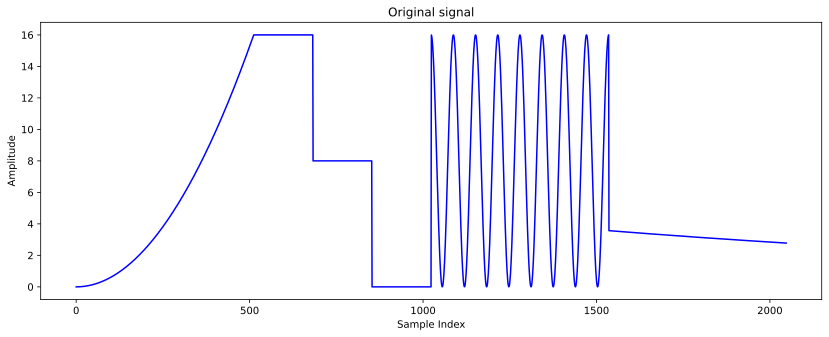

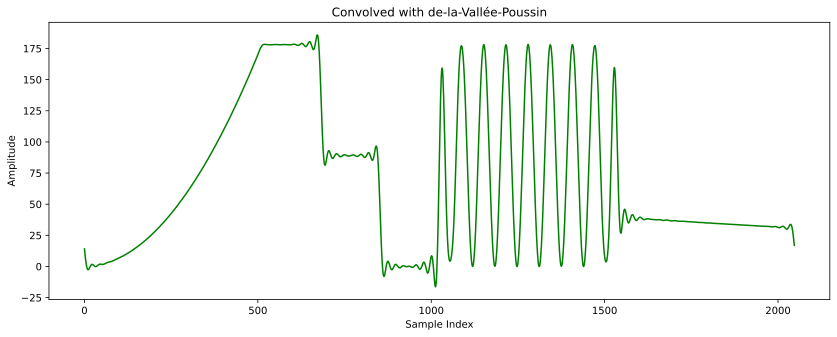

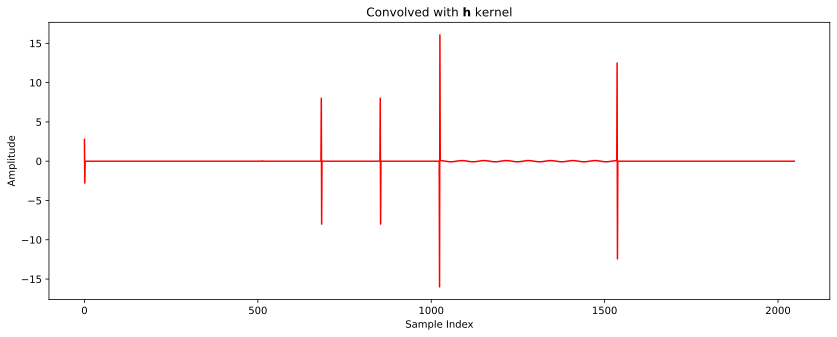

In [121]:
import matplotlib.pyplot as plt

# Define the number of intervals
intervals = 5  # For example, divide the signal into 5 intervals
interval_length = N // intervals

# Plot the original signal
plt.figure(figsize=(14, 5))
plt.plot(signal_data, color='blue')
plt.title('Original signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the smoothed signal
plt.figure(figsize=(14, 5))
plt.plot(convolution_vp, color='green')
plt.title('Convolved with de-la-Vallée-Poussin')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the finite difference filtered signal
plt.figure(figsize=(14, 5))
plt.plot(convolution_h, color='red')
plt.title('Convolved with $\mathbf{h}$ kernel')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.show()

**De-la-Vallée-Poussin Filter:**

The filter smooths the signal by reducing high-frequency noise and highlighting the general trend. The smoothed signal shows the underlying behavior without abrupt fluctuations, making it easier to identify overall patterns such as peaks, troughs, and periodic behavior. For each interval, the smoothed signal helps to identify broad trends and detect any gradual changes in the signal's amplitude or frequency. This filter could typically be used to assess the overall behavior of the signal over time. In each interval, it can be used to identify slow trends or cyclic patterns that are otherwise obscured by noise.

**h filter:**

The h kernel filter highlights rapid changes and oscillations in the signal by accentuating high-frequency components. It is effective in detecting sharp transitions, sudden peaks, or any discontinuities in the signal. Each interval's filtered output will show where the signal undergoes abrupt changes or spikes, indicating transitions between different states or events. This filter is useful for pinpointing moments of sudden change or identifying transitions in the signal. For each interval, it reveals areas with significant fluctuations, which could indicate events or anomalies in the data.

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/var/folders/n5/2z61r6rj12lgkhg5q_g35cp80000gn/T/ipykernel_49559/1750996392.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'Convolved with $\mathbf{{h}}$ - Interval {i+1}')


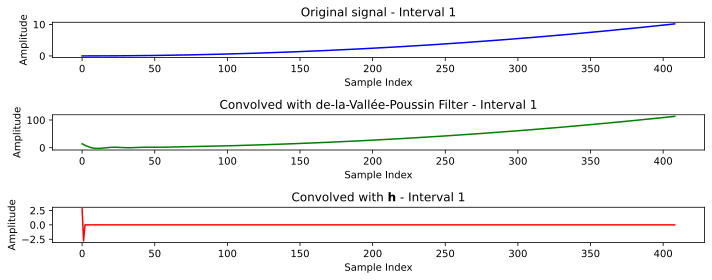

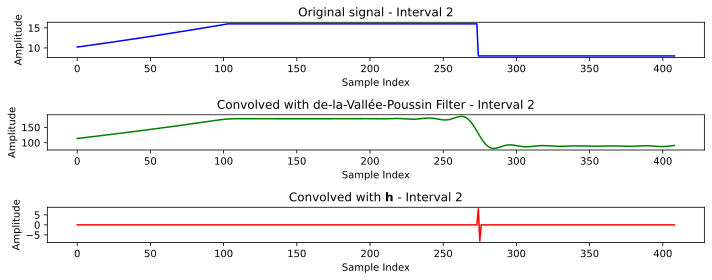

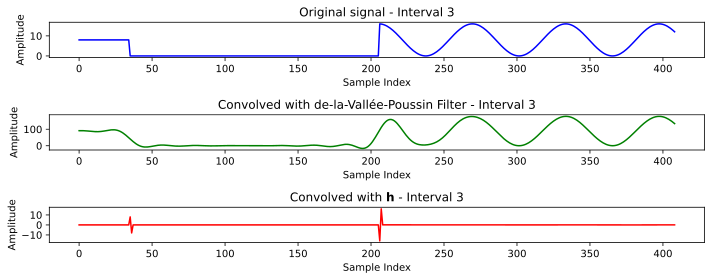

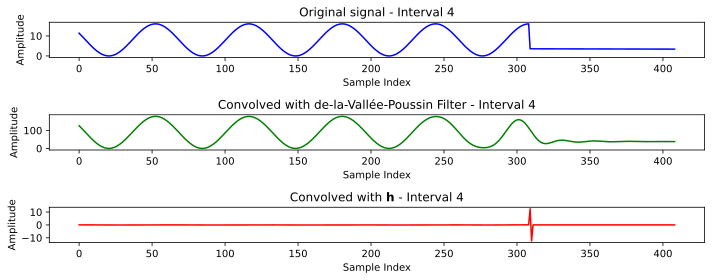

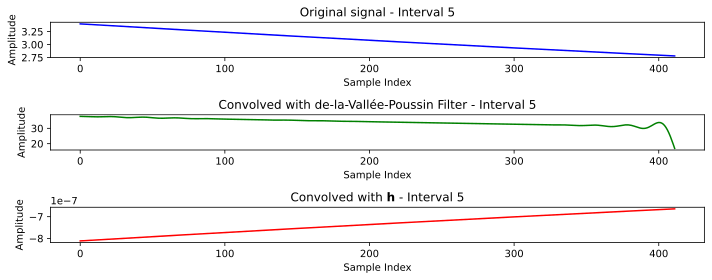

In [131]:
# Plot each interval separately
for i in range(intervals):
    plt.figure(figsize=(10, 4))
    start_idx = i * interval_length
    end_idx = (i + 1) * interval_length if i < intervals - 1 else N

    plt.subplot(3, 1, 1)
    plt.plot(signal_data[start_idx:end_idx], color='blue')
    plt.title(f'Original signal - Interval {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    
    plt.subplot(3, 1, 2)
    plt.plot(convolution_vp[start_idx:end_idx], color='green')
    plt.title(f'Convolved with de-la-Vallée-Poussin Filter - Interval {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(convolution_h[start_idx:end_idx], color='red')
    plt.title(f'Convolved with $\mathbf{{h}}$ - Interval {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

When analysing the filtered signals we observe distinct behaviors across the intervals:

- **Intervals 1 \& 3**:
    - Both intervals show significant changes in the signal's amplitude. The **De-la-Vallée-Poussin filter** highlights the overall trend, with a clear upward movement in Interval 1 and a gradual decrease in Interval 3. The **Finite Difference filter**, on the other hand, emphasizes the sharp transitions and fluctuations within these changes, revealing potential high-frequency noise or rapid variations.

- **Intervals 2 \& 4**:
    - These intervals demonstrate a period of relative stability followed by moderate fluctuations. During the plateau (Interval 2), the **De-la-Vallée-Poussin filter** shows a stable signal, while the **Finite Difference filter** captures minor oscillations. In the fluctuation phase (Interval 4), the smooth filter indicates moderate variability, whereas the finite difference highlights high-frequency components, suggesting an increase in noise or signal variability.

- **Interval 5**:
    - This interval is characterized by a clear downward trend in the signal amplitude. The **De-la-Vallée-Poussin filter** captures this overall decline, while the **Finite Difference filter** accentuates the sharp drops, making it easier to pinpoint moments of rapid change or signal reduction.

The smooth **De-la-Vallée-Poussin filter** effectively captures the overall trends and steady states, while the **Finite Difference filter** is useful for identifying rapid changes, noise, and high-frequency components within the signal. This complementary approach allows for a nuanced analysis of each interval, providing insight into both the general behavior and finer details of the signal.

#### Task 3: Sound Processing

In [133]:
import IPython.display as ipd # in order to play audio

#### a)

In [141]:
# Define parameters
sampling_rate = 44100  # Sampling rate in Hz
frequency = 440  # Frequency of the sine wave in Hz
duration = 3  # Duration of the signal in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
signal = 0.5 * np.sin(2 * np.pi * frequency * t)

# Play the sound
ipd.Audio(signal, rate=sampling_rate)

In [145]:
# Compute the FFT of the signal
N = len(signal)
signal_fft = fft(signal)
frequencies = fftfreq(N, 1 / sampling_rate)

# Take the magnitude of the FFT and only consider the positive half
magnitude = np.abs(signal_fft)[:N // 2]
frequencies = frequencies[:N // 2]

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies, magnitude)
plt.title("Spectrum of the 440 Hz Sine Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

TypeError: 'module' object is not callable

In [144]:
signal_length = len(signal) / sampling_rate  # in seconds
print(f"The length of the signal is: {signal_length} seconds")

The length of the signal is: 3.0 seconds


#### b)

#### c)

#### d)

#### e)

#### f)

#### g)

#### References
- Plonka, Gerlind, Daniel Potts, Gabriele Steidl, and Manfred Tasche (2018). *Numerical Fourier Analysis*. Springer International Publishing.